# 고양이 수염 스티커 만들기
## 목표
얼굴인식 카메라앱 따라하기
- 정면사진에 스티커 적용
- 얼굴 각도가 살짝 틀어진 측면사진에 스티커 적용
- 얼굴 이목구비를 알아볼 수 없는 사진에 스티커 사진 적용
- 2명 얼굴에 스티커 사진 적용

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import dlib

# 정면사진
## 1. 스티커 구하기 OR 만들기
고양이 수염 스티커 붙이기

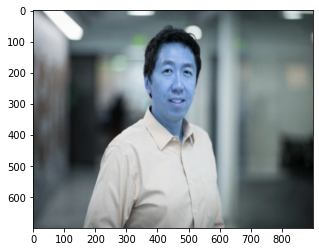

In [42]:
my_image_path = os.getenv('HOME')+'/aiffel/AIFFEL_PROJECT/EXPLORATION_3/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (900,700))    # 900X700의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

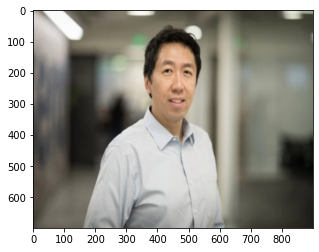

In [43]:
#opencv는 이미지 채널을 예외적으로 BGR(파랑, 녹색, 빨강)을 사용
#원본 사진에서 붉은색은 푸른색으로, 푸른색은 붉은색으로 바뀌어 출력된 것

# plt.imshow 이전에 RGB 이미지로 바꾸기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 2. 얼굴 검출 & 랜드마크 검출 하기
dlib을 이용해서,
- 얼굴의 bounding box 위치
- 얼굴의 landmark 위치(코를 기준)찾기

In [44]:
#dlib을 활용해 hog detector를 선언
#dlib 에 있는 정면 얼굴 검출기로 입력사진에서 얼굴을 검출하여 detector_hog로 반환
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언


In [45]:
#detector를 이용해서 얼굴의 bounding box를 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

rectangles[[(366, 160) (551, 345)]]


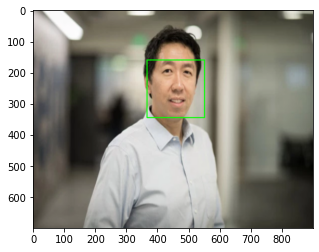

In [46]:
print(dlib_rects)   # 찾은 얼굴영역 좌표
#dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [47]:
#Object keypoint estimation 알고리즘
#top-down : bounding box를 찾고 box 내부의 keypoint를 예측
#Dlib landmark localization
#ibug 300-W 데이터셋으로 학습한 pretrained model 을 제공합니다. 학습 알고리즘은 regression tree의 앙상블 모델을 사용

#저장한 landmark 모델을 불러오기
model_path = os.getenv('HOME')+'/aiffel/AIFFEL_PROJECT/EXPLORATION_3/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [48]:
list_landmarks = []
for dlib_rect in dlib_rects:
#points 는 dlib.full_object_detection 의 객체이기 때문에 parts() 함수로 개별 위치에 접근
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  #더 직관적인 (x, y) 형태로 접근할 수 있도록 변환
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

#68개의 랜드마크가 얼굴 개수만큼 저장됨

68


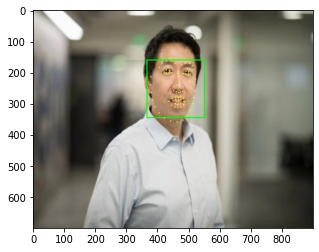

In [9]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow
#point->list_points
#2->원의 반지름
#(0,255,255)->color
#-1->선두께(음수를 지정하면 내부를 채움)
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#cv2.circle(img, center, radius, color, thickness=None, lineType=None, shift=None) -> img
#(그림을 그릴영상,원의중심좌표(x,y)튜플,원의 반지름,선색상또는 밝기->(B,G,R)튜플 또는 정수값,thickness : 선 두께. 기본값은 1, 음수(-1)를 지정하면 내부를 채움,lineType : 선 타입. cv2.LINE_4, cv2.LINE_8, cv2.LINE_AA 중 선택,shift : 그리기 좌표 값의 축소 비율. 기본값은 0)

## 3. 스티커 적용 위치 확인하기
고양이 수염이 적용될 위치를 landmark를 사용해서 계산한다.

In [49]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(471, 247)
(x,y) : (471,247)
(w,h) : (186,186)


(186, 186, 3)


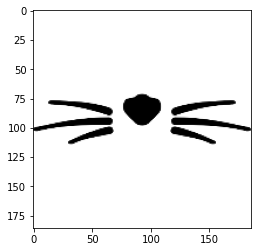

In [50]:
sticker_path = os.getenv('HOME')+'/aiffel/AIFFEL_PROJECT/EXPLORATION_3/cat_whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

print(img_sticker.shape)
plt.imshow(img_sticker)

In [51]:
refined_x = x - w // 2  # left
refined_y = y - w // 2      # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (378,154)


## 4. 스티커 적용하기
- np.where를 사용해서 배경없이 원본사진에 스티커를 적용
- cv2.addWeighted()를 사용하여 투명도 조절
- bounding box와 landmark를 제거하고 최종 결과만 출력

(x_shape,y_shape) : (186,186)


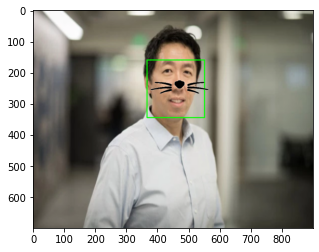

In [52]:
x_shape = img_sticker.shape[0]
y_shape = img_sticker.shape[1]
print('(x_shape,y_shape) : (%d,%d)'%(x_shape, y_shape))

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

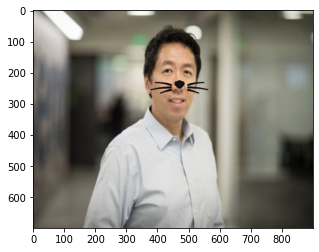

In [55]:
# bounding box와 landmark를 제거하고 최종 결과만 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area, cv2.addWeighted(img_sticker, 0.2, sticker_area,0.2, 0)).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 측면사진 
## 1. 스티커 구하기 OR 만들기
고양이 수염 스티커 붙이기

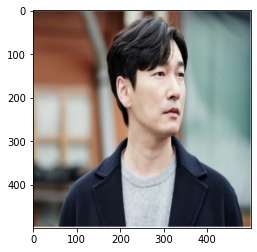

In [59]:
my_image_path = os.getenv('HOME')+'/aiffel/AIFFEL_PROJECT/EXPLORATION_3/image_3.PNG'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (500,500))    # 500X500의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 2. 얼굴 검출 & 랜드마크 검출 하기
dlib을 이용해서,
- 얼굴의 bounding box 위치
- 얼굴의 landmark 위치                                                                    
찾기

In [60]:
#dlib 에 있는 정면 얼굴 검출기로 입력사진에서 얼굴을 검출하여 detector_hog로 반환
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

In [61]:
#detector를 이용해서 얼굴의 bounding box를 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

rectangles[[(236, 98) (390, 253)]]


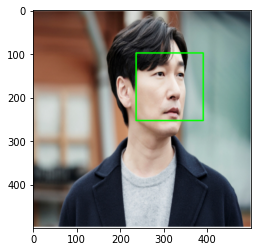

In [62]:
print(dlib_rects)   # 찾은 얼굴영역 좌표
#dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [63]:
model_path = os.getenv('HOME')+'/aiffel/AIFFEL_PROJECT/EXPLORATION_3/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [64]:
list_landmarks = []
for dlib_rect in dlib_rects:
#points 는 dlib.full_object_detection 의 객체이기 때문에 parts() 함수로 개별 위치에 접근
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  #금 더 직관적인 (x, y) 형태로 접근할 수 있도록 변환
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


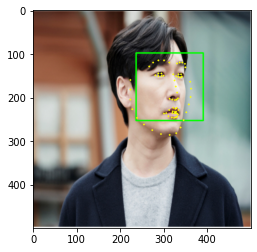

In [65]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 3. 스티커 적용 위치 확인하기
- 고양이 수염이 적용될 위치를 landmark를 사용해서 계산한다.
- 이동해 가야 할 좌표점을 찾는다.(비율로 해서 찾아야 하지만 어려워서 직접 점을 찍었다..)
### 카메라 원근의 기술
- 기준점인 빨강점에서 초록점으로 이동한다.
- 원근법을 사용해 기준점을 오른쪽으로 이동하면 오른쪽 수염의 길이가 더 짧아지고 왼쪽의 수염길이가 더 길어진 형태로 변환된다.
- 고양이 수염이 측면사진에서도 얼굴형태에 맞게 잘 적용된다.

In [66]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
img_sticker = cv2.imread(sticker_path) # sticker_path 그대로 사용
img_sticker = cv2.resize(img_sticker, (w,h))
sticker_copy = img_sticker.copy()
print (img_sticker.shape)

(330, 189)
(x,y) : (330,189)
(w,h) : (155,155)
(155, 155, 3)


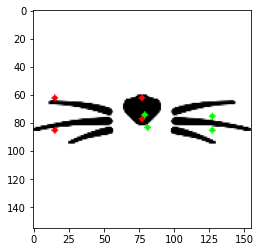

In [67]:
cat_list1 = [(w//2, int(w*0.4)), (int(w*0.1), int(w*0.4)), (int(w*0.1), int(w*0.55)), (w//2, w//2)]
cat_list2 = [(79,74),(127,75),(127,85),(81,83)]

# 빨강: 기준점, 초록: 변환된 점
for point in cat_list1:
    cv2.circle(sticker_copy, point, 2, (255, 0, 0), -1)
for point in cat_list2:
    cv2.circle(sticker_copy, point, 2, (0, 255, 0), -1)

plt.imshow(sticker_copy)
plt.show()

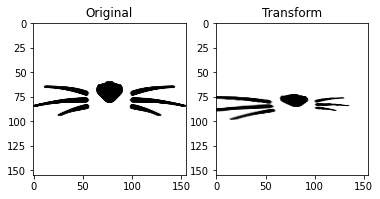

In [68]:
# 변환과정
pts1 = np.float32(cat_list1) # 이동 전 스티커의 좌표
pts2 = np.float32(cat_list2) # 이동 후 스티커의 좌표
M = cv2.getPerspectiveTransform(pts1,pts2) # 변환시켜주는 매트릭스
dst = cv2.warpPerspective(img_sticker,M,(w,h), borderValue = [255, 255, 255, 255]) 
      # 실제로 이미지를 M을 이용해 변환해주는 코드
      # 회전시켰을 때 검은 배경을 없애기 위해 borderValue 설정

plt.subplot(121),plt.imshow(img_sticker),plt.title('Original')
plt.subplot(122),plt.imshow(dst,),plt.title('Transform')
plt.show()

In [69]:
refined_x = int(x - cat_list2[0][0])       # left
refined_y = int(y - cat_list2[0][1])       # top

## 4. 스티커 적용하기
- np.where를 사용해서 배경없이 원본사진에 스티커를 적용
- cv2.addWeighted()를 사용하여 투명도 조절
- bounding box와 landmark를 제거하고 최종 결과만 출력

In [70]:
sticker_area2 = img_bgr[refined_y:refined_y+dst.shape[0], refined_x:refined_x+dst.shape[1]]
img_bgr[refined_y:refined_y+dst.shape[0], refined_x:refined_x+dst.shape[1]] = \
    np.where(dst==0, cv2.addWeighted(dst, 0.2, sticker_area2, 0.2, 0), sticker_area2).astype(np.uint8)

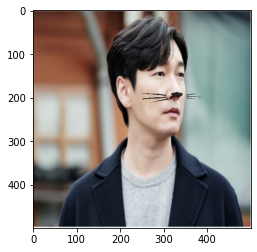

In [71]:
plt.subplot(),plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 좀비
### 문제점
- 얼굴 형태를 제대로 알아볼 수가 없어 얼굴의 bounding box 위치를 찾을 수가 없다.
- 좀비로는 얼굴인식을 못해 고양이 스티커를 붙일 수가 없다.


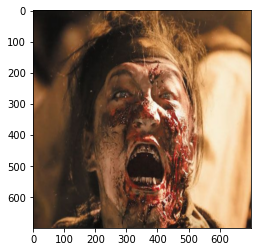

In [28]:
my_image_path = os.getenv('HOME')+'/aiffel/AIFFEL_PROJECT/EXPLORATION_3/image_5.PNG'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr,(700,700))    # 700X700의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [29]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

In [30]:
#detector를 이용해서 얼굴의 bounding box를 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

rectangles[]


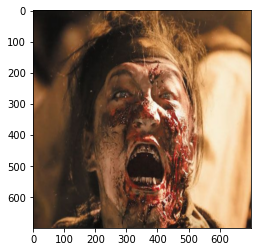

In [31]:
print(dlib_rects)   # 찾은 얼굴영역 좌표
#dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 인원수 2명인 사진
## 1. 스티커 구하기 OR 만들기
고양이 수염 스티커 붙이기

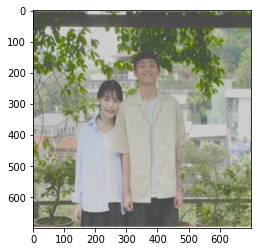

In [32]:
my_image_path = os.getenv('HOME')+'/aiffel/AIFFEL_PROJECT/EXPLORATION_3/image_4.PNG'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr,(700,700))    # 700X700의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 2. 얼굴 검출 & 랜드마크 검출 하기
dlib을 이용해서,
- 얼굴의 bounding box 위치
- 얼굴의 landmark 위치 찾기

### 문제점
- 2명 모두 얼굴의 bounding box 위치가 인식이 되지만, landmark는 남자의 얼굴이 제대로 인식되지 않아 여자의 얼굴에만 landmark가 표시됐다.

In [33]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
#detector를 이용해서 얼굴의 bounding box를 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

rectangles[[(328, 155) (403, 229)], [(212, 271) (287, 345)]]


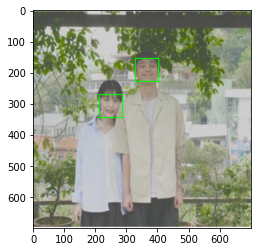

In [34]:
print(dlib_rects)   # 찾은 얼굴영역 좌표
#dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [35]:
list_landmarks = []
for dlib_rect in dlib_rects:
#points 는 dlib.full_object_detection 의 객체이기 때문에 parts() 함수로 개별 위치에 접근
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  #금 더 직관적인 (x, y) 형태로 접근할 수 있도록 변환
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


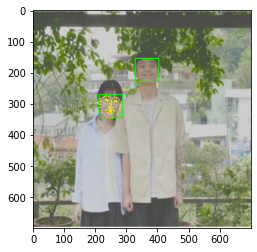

In [36]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 3. 스티커 적용 위치 확인하기
고양이 수염이 적용될 위치를 landmark를 사용해서 계산한다.

In [37]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(369, 192)
(x,y) : (369,192)
(w,h) : (76,76)
(251, 308)
(x,y) : (251,308)
(w,h) : (76,76)


In [38]:
refined_x = x - w // 2  # left
refined_y = y - w // 2   # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (213,270)


## 4. 스티커 적용하기
- np.where를 사용해서 배경없이 원본사진에 스티커를 적용
- cv2.addWeighted()를 사용하여 투명도 조절
- bounding box와 landmark를 제거하고 최종 결과만 출력
### 문제점
- 2명이상일 때 1명에게만 제대로 스티커 사진이 적용됐다. 
- 2명의 landmark 좌표가 각각 적용되어야 하는데 제대로 되고 있지 않아 고양이 수염 이미지가 잘못된 곳에 있다.

(x_shape,y_shape) : (155,155)


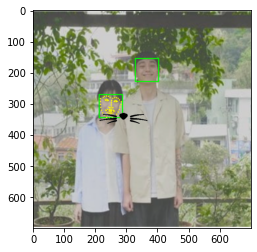

In [39]:
x_shape = img_sticker.shape[0]
y_shape = img_sticker.shape[1]
print('(x_shape,y_shape) : (%d,%d)'%(x_shape, y_shape))

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

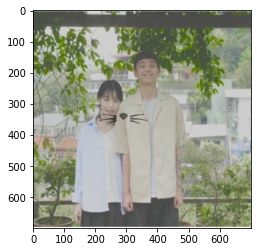

In [40]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area, cv2.addWeighted(img_sticker, 0.5, sticker_area, 0.5, 0)).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 결과
- 얼굴 형태가 잘 보이는 정면사진과 측면사진은 얼굴 인식이 잘 되어 고양이 수염 스티커 사진을 잘 붙일 수 있다.
- 하지만, 얼굴 형태가 잘 안타나 있거나, 얼굴 좌표가 전부 다른 2명 이상의 사진에서는 인식이 잘 되지 않아 고양이 수염 스티커 사진을 제대로 적용할 수 없다.